In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
np.random.seed(0)

In [9]:
#y=4x+6(w0=6,w1=4)
x=2*np.random.rand(100,1)
y=6+4*x+np.random.randn(100,1)

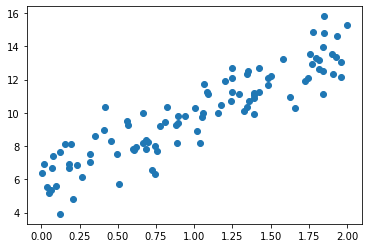

In [10]:
plt.scatter(x,y)

In [26]:
x.T.shape

(1, 100)

y=w0+w1*x
x: n*m
y: 1*m
w1: 1*m
w0: 1*m

In [40]:
def get_weight_update(w1,w0,x,y,learning_rate=0.1):
    N=len(y)
    #먼저 w1_update, w0_update를 각각 w1,w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)
    #예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred=np.dot(x,w1.T)+w0
    diff=y-y_pred
    
    #w0_update를 dot행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors=np.ones((N,1))
    
    #w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update=-(2/N)*learning_rate*(np.dot(x.T,diff))
    w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    
    return w1_update,w0_update

In [37]:
def gradient_descent_steps(x,y,iters=10000):
    #wo,w1모두 0으로 초기화
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    
    #인자로 주어진 iters만큼 반복적으로 get_weight_update()호출해 w1,w0업데이트 수행
    for i in range(iters):
        w1_update,w0_update=get_weight_update(w1,w0,x,y,learning_rate=0.1)
        w1=w1-w1_update
        w0=w0-w0_update
    
    return w1,w0

In [38]:
def get_cost(y,y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N
    return cost

In [74]:
w1,w0=gradient_descent_steps(x,y,iters=1000)

y_pred=w1[0,0]*x+w0
get_cost(y,y_pred)

1.2363814376966398

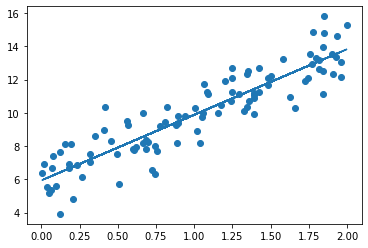

In [49]:
plt.scatter(x,y)
plt.plot(x,y_pred)

### 확률적 경사하강법(미니배치)
전체 데이터를 사용하는 것이 아니라, 랜덤하게 추출한 일부 데이터 사용

In [71]:
def stochastic_gradient_descent_steps(x,y,batch_size=20,iters=1000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    prev_cost=100000
    iter_index=0
    
    for i in range(iters):
        np.random.seed(i)
        #전체 x,y데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_x,sample_y로 저장
        stochastic_random_index=np.random.permutation(x.shape[0])
        sample_x=x[stochastic_random_index[0:batch_size]]
        sample_y=y[stochastic_random_index[0:batch_size]]
        
        #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update,w0_update 계산 후 업데이트
        w1_update,w0_update=get_weight_update(w1,w0,sample_x,sample_y,learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update
        
    return w1,w0

In [75]:
w1,w0=stochastic_gradient_descent_steps(x,y,iters=1000)
y_pred=w1*x+w0
get_cost(y,y_pred)

1.2387224849463216

In [76]:
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

boston=load_boston()

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [80]:
bostonDF=pd.DataFrame(boston.data,columns=boston.feature_names)

In [81]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [82]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [116]:
bostonDF['PRICE']=boston.target

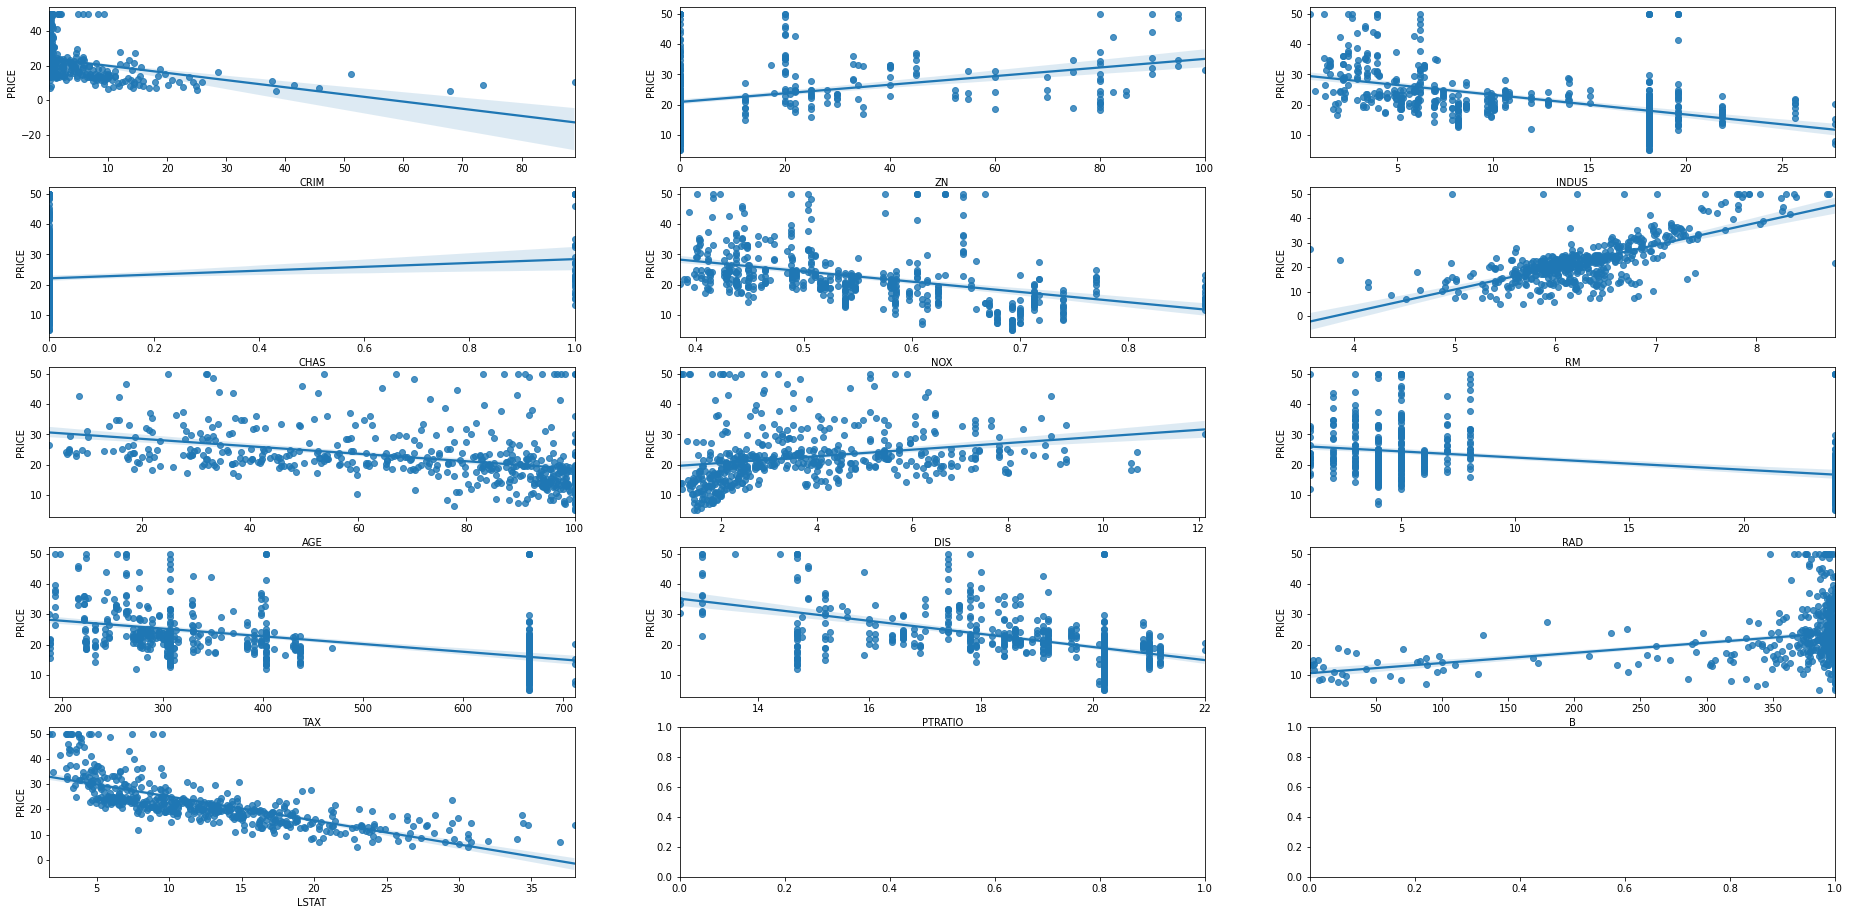

In [106]:
#2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4*2개의 ax를 가짐
fig,axs=plt.subplots(figsize=(32,16),ncols=3,nrows=5)
lm_features=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
for i,feature in enumerate(lm_features):
    row=int(i/3)
    col=i%3
    #시본의 regplot을 이용해 산점도와 선형회귀직선을 함께 표현
    sns.regplot(x=feature,y='PRICE',data=bostonDF,ax=axs[row][col])

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_squared_log_error

In [118]:
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [117]:
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)
X_train,X_test,y_train,y_test=train_test_split(X_data,y_target,test_size=0.3,random_state=156)

In [120]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
mse=mean_squared_error(y_test,pred)
rmse=np.sqrt(mse)
print('MSE:{0},RMSE:{1}'.format(mse,rmse))
print('Variance score:',r2_score(y_test,pred))

MSE:17.29691590790215,RMSE:4.158956107955715
Variance score: 0.7572263323138921


In [124]:
print('절편값:',lr.intercept_)
print('회귀계수값:',np.round(lr.coef_,1))

절편값: 40.995595172164336
회귀계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [128]:
coeff=pd.Series(np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [130]:
from sklearn.model_selection import cross_val_score

neg_mse_scores=cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
np.mean(rmse_scores)

5.828658946215808

In [131]:
from sklearn.preprocessing import PolynomialFeatures

In [135]:
X=np.arange(4).reshape(2,2)
X

array([[0, 1],
       [2, 3]])

In [136]:
#2차 다항식으로 변환하기 위해 PolynominalFeature이용해 변환
poly=PolynomialFeatures(degree=2)
poly.fit_transform(X)


array([[1., 0., 1., 0., 0., 1.],
       [1., 2., 3., 4., 6., 9.]])

In [151]:
def poly(X):
    y=1+2*X+X**2+X**3
    return y

X=np.arange(4).reshape(2,2)
y=poly(X)
y

array([[ 1,  5],
       [17, 43]])

In [145]:
#3차 다항식 변환
poly=PolynomialFeatures(degree=3).fit_transform(X)
poly

array([[ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

In [148]:
#선형 회귀에 3차 다항식 계수 피처와 3차 다항식 결정값으로 학습 후 회귀계수 확인
model=LinearRegression()
model.fit(poly,y)
print('Polynominal회귀계수\n:',np.round(model.coef_,2))

Polynominal회귀계수
: [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


In [149]:
from sklearn.pipeline import Pipeline

In [153]:
model=Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression())])
X=np.arange(4).reshape(2,2)
y=poly(X)

model=model.fit(X,y)
print('Polynominal회귀계수\n:',np.round(model.named_steps['linear'].coef_,2))

Polynominal회귀계수
: [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


In [182]:
def true_fun(X):
    return np.cos(1.5*np.pi*X)

np.random.seed(0)
n_samples=30
X=np.sort(np.random.rand(n_samples))
y=true_fun(X)+np.random.randn(n_samples)*0.1

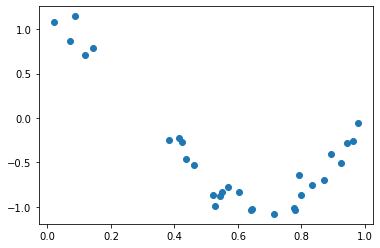

In [183]:
plt.scatter(X,y)

Dgree1회귀계수는 [-1.61]입니다.
Degree1 MSE는0.40772896250986834입니다.
Dgree4회귀계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree4 MSE는0.04320874987231747입니다.
Dgree15회귀계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08]입니다.
Degree15 MSE는182815433.47648773입니다.


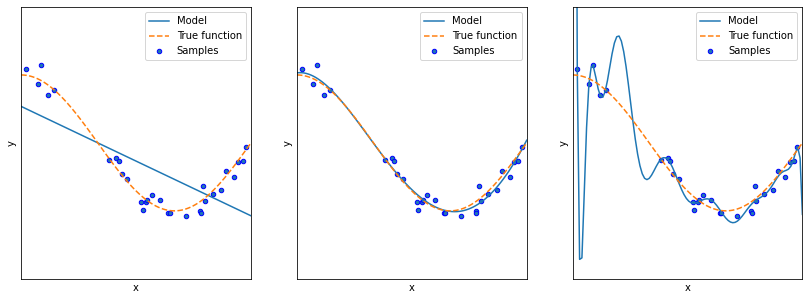

In [184]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]
for i in range(len(degrees)):
    ax=plt.subplot(1,len(degrees),i+1)
    plt.setp(ax,xticks=(),yticks=())
    
    #개별 degree별로 Polynominal변환한다
    poly=PolynomialFeatures(degree=degrees[i],include_bias=False)
    linear=LinearRegression()
    pipeline=Pipeline([('poly',poly),('linear',linear)])
    pipeline.fit(X.reshape(-1,1),y)
    
    #교차검증으로 다항회귀 평가
    scores=cross_val_score(pipeline,X.reshape(-1,1),y,scoring='neg_mean_squared_error',cv=10)
    #Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coeff=pipeline.named_steps['linear'].coef_
    print('Dgree{0}회귀계수는 {1}입니다.'.format(degrees[i],np.round(coeff,2)))
    print('Degree{0} MSE는{1}입니다.'.format(degrees[i],-1*np.mean(scores)))
    
    #0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측 수행
    #테스트 데이터 세트에 회귀예측을 수행하고 예측곡선과 실제 곡선 그려서 비교
    X_test=np.linspace(0,1,100)
    #예측값 곡선
    plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),label='Model')
    #실제값 곡선
    plt.plot(X_test,true_fun(X_test),'--',label='True function')
    plt.scatter(X,y,edgecolor='b',s=20,label='Samples')
    
    plt.xlabel('x');plt.ylabel('y');plt.ylim((-2,2));plt.xlim((0,1));plt.legend(loc='best')
    
plt.show()

In [176]:
n_samples=30
X=np.sort(np.random.randn(n_samples))
X.reshape(-1,1)

array([[-1.7262826 ],
       [-1.63019835],
       [-1.23482582],
       [-1.18063218],
       [-1.16514984],
       [-0.90729836],
       [-0.87079715],
       [-0.81314628],
       [-0.68481009],
       [-0.67246045],
       [-0.63432209],
       [-0.57884966],
       [-0.51080514],
       [-0.40178094],
       [-0.36274117],
       [-0.35955316],
       [-0.31155253],
       [-0.02818223],
       [ 0.0519454 ],
       [ 0.05616534],
       [ 0.06651722],
       [ 0.12898291],
       [ 0.17742614],
       [ 0.3024719 ],
       [ 0.40234164],
       [ 0.42833187],
       [ 0.46278226],
       [ 0.72909056],
       [ 0.90082649],
       [ 1.13940068]])

In [185]:
from sklearn.linear_model import Ridge

In [187]:
#cross_val_score 는 내부에서 estimator를 학습(fit),예측(predict),평가시켜주므로 간단하게 교차검증 가능
ridge=Ridge(alpha=10)
neg_mse_scores=cross_val_score(ridge,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5개 folds의 개별 RMSE scores:',np.round(rmse_scores,3))
print('5개 folds의 평균 RMSE:',avg_rmse)

5개 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5개 folds의 평균 RMSE: 5.518166280868973


In [195]:
alphas=[0,0.1,1,10,100]

for i in alphas:
    ridge=Ridge(alpha=i)
    neg_mse_scores=cross_val_score(ridge,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
    rmse_scores=np.sqrt(-1*neg_mse_scores)
    avg_rmse=np.mean(rmse_scores)
    print('alpha {0}일 때 5folds의 평균 RMSE:{1}'.format(i,np.round(avg_rmse,3)))

alpha 0일 때 5folds의 평균 RMSE:5.829
alpha 0.1일 때 5folds의 평균 RMSE:5.788
alpha 1일 때 5folds의 평균 RMSE:5.653
alpha 10일 때 5folds의 평균 RMSE:5.518
alpha 100일 때 5folds의 평균 RMSE:5.33


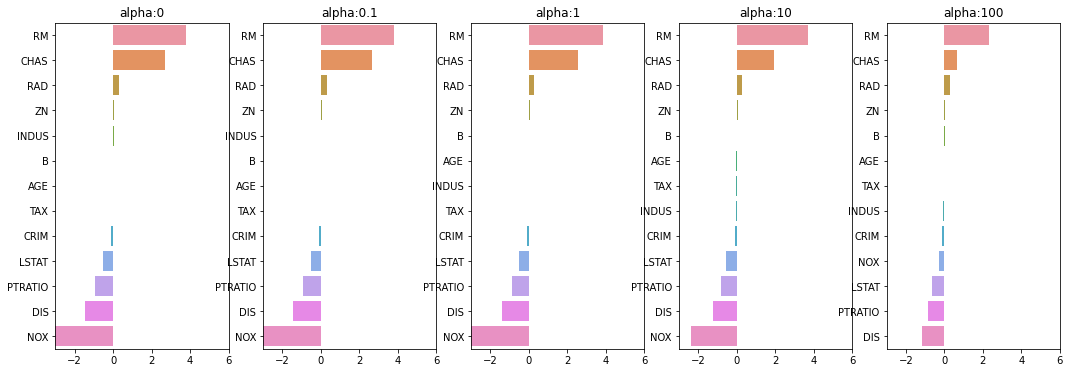

In [197]:
fig,axs=plt.subplots(figsize=(18,6),nrows=1,ncols=5)
#각 alpha에 따른 회귀계수 값을 데이터로 저장하기 위한 DataFrame생성
coeff_df=pd.DataFrame()
#alphas리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장, pos는 axis위치 지정
for pos,alpha in enumerate(alphas):
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_data,y_target)
    #alpha에 따른 피처별로 회귀계수를 Series로 변환하고 이를 DataFrame칼럼으로 추가
    coeff=pd.Series(data=ridge.coef_,index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname]=coeff
    #막대 그래프로 각 alpha 값에서의 회귀계수를 시각화, 회귀계수값이 높은 순으로 표현
    coeff=coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values,y=coeff.index,ax=axs[pos])
    
plt.show()

In [204]:
ridge_alphas=[0,0.1,1,10,100]
sort_column='alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column,ascending=True)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
NOX,-17.766611,-16.684645,-10.777015,-2.371619,-0.262847
DIS,-1.475567,-1.459626,-1.372654,-1.248808,-1.153390
PTRATIO,-0.952747,-0.940759,-0.876074,-0.797945,-0.829218
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
B,0.009312,0.009368,0.009673,0.010037,0.009393
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
ZN,0.046420,0.046572,0.047443,0.049579,0.054496


In [211]:
coeff_df[colname]

CRIM      -0.102202
ZN         0.054496
INDUS     -0.052826
CHAS       0.638335
NOX       -0.262847
RM         2.334536
AGE        0.001212
DIS       -1.153390
RAD        0.315358
TAX       -0.015856
PTRATIO   -0.829218
B          0.009393
LSTAT     -0.660764
Name: alpha:100, dtype: float64

In [206]:
from sklearn.linear_model import Lasso,ElasticNet

In [228]:
def get_linear_reg_eval(model_name,params=None,X_data_n=None,y_target_n=None,verbose=True):
    coeff_df=pd.DataFrame()
    if verbose:print('#####',model_name,'#####')
    for param in params:
        if model_name=='Ridge':model=Ridge(alpha=param)
        elif model_name=='Lasso':model=Lasso(alpha=param)
        elif model_name=='ElasticNet':model=ElasticNet(alpha=param,l1_ratio=0.7)
        neg_mse_scores=cross_val_score(model,X_data_n,y_target_n,scoring='neg_mean_squared_error',cv=5)
        avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha{0}일 때 5폴드 세트의 평균 RMSE:{1}'.format(param,np.round(avg_rmse,3)))
        #cross_val_score 는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀계수 추출
        model.fit(X_data,y_target)
        #alpha에 따른 피처별 회귀계수를 Series로 변환하고 이를 DF의 칼럼으로 추가
        coeff=pd.Series(data=model.coef_,index=X_data.columns)
        colname='alpha'+str(param)
        coeff_df[colname]=coeff
    return coeff_df
        

In [217]:
lasso_alphas=[0.07,0.1,0.5,1,3]
get_linear_reg_eval('Lasso',params=lasso_alphas,X_data_n=X_data,y_target_n=y_target)

##### Lasso #####
alpha0.07일 때 5폴드 세트의 평균 RMSE:5.612
alpha0.1일 때 5폴드 세트의 평균 RMSE:5.615
alpha0.5일 때 5폴드 세트의 평균 RMSE:5.669
alpha1일 때 5폴드 세트의 평균 RMSE:5.776
alpha3일 때 5폴드 세트의 평균 RMSE:6.189


,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,3.789725,3.703202,2.498212,0.949811,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
DIS,-1.176583,-1.160538,-0.936605,-0.668790,-0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602


In [218]:
elastic_alphas=[0.07,0.1,0.5,1,3]
get_linear_reg_eval('ElasticNet',params=elastic_alphas,X_data_n=X_data,y_target_n=y_target)

##### ElasticNet #####
alpha0.07일 때 5폴드 세트의 평균 RMSE:5.542
alpha0.1일 때 5폴드 세트의 평균 RMSE:5.526
alpha0.5일 때 5폴드 세트의 평균 RMSE:5.467
alpha1일 때 5폴드 세트의 평균 RMSE:5.597
alpha3일 때 5폴드 세트의 평균 RMSE:6.068


,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.574162,3.414154,1.918419,0.938789,0.000000
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
DIS,-1.189438,-1.173647,-0.975902,-0.725174,-0.031208
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417


## 선형회귀 모델을 위한 데이터 변환

In [223]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [219]:
#method는 표준정규분포변환(Standard),최댓값/최솟값 정규화(MinMax), 로그변환(log)결정
#p_degree는 다항싱 특성 추가할 때 적용, p_degree는 2이상 부여하지 않음

def get_scaled_data(method=None,p_degree=None,input_data=None):
    if method=='Standard':
        scaled_data=StandardScaler().fit_transform(input_data)
    elif method=='MinMax':
        scaled_data=MinMaxScaler().fit_transform(input_data)
    elif method=='Log':
        scaled_data=np.log1p(input_data)
    else:
        scaled_data=input_data
        
    if p_degree != None :
        scaled_data=PolynomialFeatures(degree=p_degree,include_bias=False).fit_transform(scaled_data)
    return scaled_data    
    

In [229]:
alphas=[0.1,1,10,100]
scale_methods=[(None,None),('Standard',None),('Standard',2),('MinMax',None),('MinMax',2),
              ('Log',None)]

for scale_method in scale_methods:
    X_data_scaled=get_scaled_data(method=scale_method[0],p_degree=scale_method[1],input_data=X_data)
    print('\n변환유형:{0},Polynominal Degree:{1}'.format(scale_method[0],scale_method[1]))
    get_linear_reg_eval('Ridge',params=alphas,X_data_n=X_data_scaled,y_target_n=y_target,verbose=False)


변환유형:None,Polynominal Degree:None
alpha0.1일 때 5폴드 세트의 평균 RMSE:5.788
alpha1일 때 5폴드 세트의 평균 RMSE:5.653
alpha10일 때 5폴드 세트의 평균 RMSE:5.518
alpha100일 때 5폴드 세트의 평균 RMSE:5.33

변환유형:Standard,Polynominal Degree:None
alpha0.1일 때 5폴드 세트의 평균 RMSE:5.826
alpha1일 때 5폴드 세트의 평균 RMSE:5.803
alpha10일 때 5폴드 세트의 평균 RMSE:5.637
alpha100일 때 5폴드 세트의 평균 RMSE:5.421

변환유형:Standard,Polynominal Degree:2
alpha0.1일 때 5폴드 세트의 평균 RMSE:8.827
alpha1일 때 5폴드 세트의 평균 RMSE:6.871
alpha10일 때 5폴드 세트의 평균 RMSE:5.485
alpha100일 때 5폴드 세트의 평균 RMSE:4.634

변환유형:MinMax,Polynominal Degree:None
alpha0.1일 때 5폴드 세트의 평균 RMSE:5.764
alpha1일 때 5폴드 세트의 평균 RMSE:5.465
alpha10일 때 5폴드 세트의 평균 RMSE:5.754
alpha100일 때 5폴드 세트의 평균 RMSE:7.635

변환유형:MinMax,Polynominal Degree:2
alpha0.1일 때 5폴드 세트의 평균 RMSE:5.298
alpha1일 때 5폴드 세트의 평균 RMSE:4.323
alpha10일 때 5폴드 세트의 평균 RMSE:5.185
alpha100일 때 5폴드 세트의 평균 RMSE:6.538

변환유형:Log,Polynominal Degree:None
alpha0.1일 때 5폴드 세트의 평균 RMSE:4.77
alpha1일 때 5폴드 세트의 평균 RMSE:4.676
alpha10일 때 5폴드 세트의 평균 RMSE:4.836
alpha100일 때 5폴드 세트의 평균 

In [239]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
cancer=load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

**선형 회귀계열의 로지스틱 회귀는 데이터의 정규분포도에 따라 예측성능을 영향
받을 수 있으므로 데이터에 먼저 정규분포형태의 표준스케일링 적용한후 데이터 세트 분리**

In [237]:
data_scaled=StandardScaler().fit_transform(cancer.data)

In [245]:
X_train,X_test,y_train,y_test=train_test_split(data_scaled,cancer.target,test_size=0.2,
                                              random_state=0)

In [242]:
y.shape
pred_prob.shape

(114, 2)

In [246]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
pred_prob=lr.predict_proba(X_test)
print(accuracy_score(y_test,pred))
print(roc_auc_score(y_test,pred_prob[:,1]))

0.9649122807017544
0.9933312162591299


In [248]:
rid_clf=GridSearchCV(lr,param_grid=params,scoring='accuracy',cv=3)
grid_clf.fit(X_train,y_train)
print('최적하이퍼 파라미터:{0},최적평균정확도:{1}'.format(grid_clf.best_params_,grid_clf.best_score_))

최적하이퍼 파라미터:{'C': 1, 'penalty': 'l2'},최적평균정확도:0.9758626699198327


C:\Users\PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:54

In [249]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2','l1'],'C':[0.01,0.1,1,1,5,10]}

grid_clf=GridSearchCV(lr,param_grid=params,scoring='accuracy',cv=3)
grid_clf.fit(data_scaled,cancer.target)
print('최적하이퍼 파라미터:{0},최적평균정확도:{1}'.format(grid_clf.best_params_,grid_clf.best_score_))

최적하이퍼 파라미터:{'C': 1, 'penalty': 'l2'},최적평균정확도:0.975392184164114


C:\Users\PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:54

In [250]:
from sklearn.ensemble import RandomForestRegressor

In [254]:
boston=load_boston()
bostonDF=pd.DataFrame(boston.data,columns=boston.feature_names)
bostonDF['PRICE']=boston.target
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)

In [255]:
rf=RandomForestRegressor(random_state=0,n_estimators=1000)
neg_mse_scores=cross_val_score(rf,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse)

In [256]:
print('5교차 검증의 개별 RMSE score:',np.round(rmse,3))
print('5교차 검증의 평균 RMSE',avg_rmse)

5교차 검증의 개별 RMSE score: [2.808 3.625 4.536 6.799 4.345]
5교차 검증의 평균 RMSE 4.422538982804892


In [264]:
def get_model_cv_prediction(model,X_data,y_target):
    neg_mse_scores=cross_val_score(model,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
    rmse=np.sqrt(-1*neg_mse_scores)
    avg_rmse=np.mean(rmse)
    print('####',model.__class__.__name__,'####')
    print('5교차검증의 평균RMSE:',np.round(avg_rmse,2))

In [259]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

In [265]:
models=[dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]

for model in models:
    get_model_cv_prediction(model,X_data,y_target)

#### DecisionTreeRegressor ####
5교차검증의 평균RMSE: 5.98
#### RandomForestRegressor ####
5교차검증의 평균RMSE: 4.42
#### GradientBoostingRegressor ####
5교차검증의 평균RMSE: 4.27
#### XGBRegressor ####
5교차검증의 평균RMSE: 4.25
#### LGBMRegressor ####
5교차검증의 평균RMSE: 4.65


**Regressor 클래스는 선형회귀와 다른 처리 방식이므로 회귀계수를 제공하는 coef_속성 없음//
대신 feature_importances_를 이용해 피처별 중요도 확인가능**

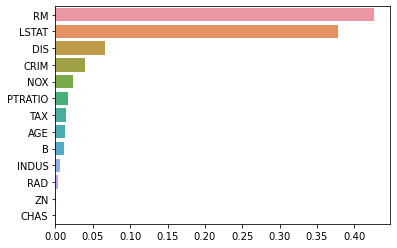

In [270]:
rf_reg.fit(X_data,y_target)
feature_series=pd.Series(rf_reg.feature_importances_,index=X_data.columns).sort_values(ascending=False)
sns.barplot(x=feature_series,y=feature_series.index)

회귀트리가 어떻게 예측값을 판단하는지

(100, 2)


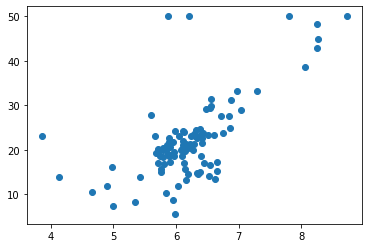

In [273]:
bostonDF_sample=bostonDF[['RM','PRICE']]
bostonDF_sample=bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM,bostonDF_sample.PRICE)

In [280]:
X_test

array([[-0.20656118,  0.28631105, -0.13712355, ...,  1.37791231,
         1.10695714,  1.49368807],
       [-0.26052388,  1.3870138 , -0.32412706, ..., -0.83070565,
        -0.73893053, -0.89030039],
       [-0.03047238, -0.84464357, -0.09799286, ..., -0.49404558,
        -1.23720696, -0.93352473],
       ...,
       [ 1.71905507,  0.05825847,  1.72302589, ...,  1.56367679,
         0.21232446, -0.17709882],
       [ 1.18794852,  0.30027345,  1.18755329, ...,  0.55415339,
         0.28027125, -0.29458036],
       [ 0.2592221 , -0.59332032,  0.27848557, ..., -0.1949952 ,
        -1.17087796,  0.08557215]])

In [281]:
lr_reg=LinearRegression()
rf_reg2=DecisionTreeRegressor(max_depth=2)
rf_reg7=DecisionTreeRegressor(max_depth=7)

X_test=np.arange(4.5,8.5,0.04).reshape(-1,1)

X_feature=bostonDF_sample['RM'].values.reshape(-1,1)
y_target=bostonDF_sample['PRICE'].values.reshape(-1,1)

lr_reg.fit(X_feature,y_target)
rf_reg2.fit(X_feature,y_target)
rf_reg7.fit(X_feature,y_target)

pred_lr=lr_reg.predict(X_test)
pred_rf2=rf_reg2.predict(X_test)
pred_rf7=rf_reg7.predict(X_test)

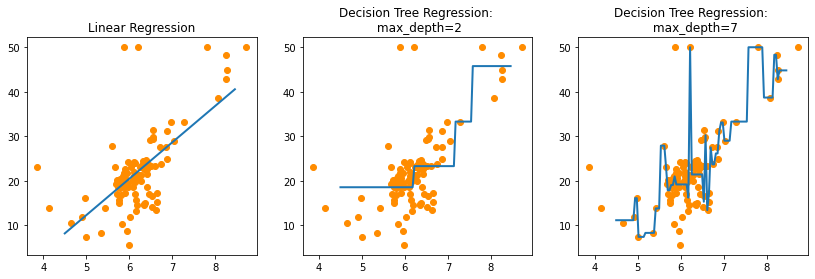

In [282]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)